In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("//content/housing.csv")

In [ ]:
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
duplicados = df.duplicated()
print(df[duplicados])

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value, ocean_proximity]
Index: []


In [ ]:
print(df.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
mean_total_bedrooms = df['total_bedrooms'].mean()
df['total_bedrooms'].fillna(mean_total_bedrooms, inplace=True)

print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:

# Importar las bibliotecas necesarias
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Definir las columnas numéricas
numeric_features = df.drop(columns=['ocean_proximity']).columns.tolist()

# Definir la transformación a aplicar a las columnas numéricas
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))  # Reducir a 2 componentes principales
])

# Crear el ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Aplicar la transformación a tus datos
transformed_data = preprocessor.fit_transform(df)

print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [ ]:
# Imprimir las primeras filas del DataFrame original
print("Primeras filas del DataFrame original:")
print(df.head())

# Imprimir las primeras filas del DataFrame transformado
print("\nPrimeras filas del DataFrame transformado:")
print(transformed_df.head())


Primeras filas del DataFrame original:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  

Primeras filas del DataFrame transf

In [ ]:
# Calcular estadísticas básicas del DataFrame transformado
print("Estadísticas básicas del DataFrame transformado:")
print(transformed_df.describe())


Estadísticas básicas del DataFrame transformado:
                PC1           PC2
count  2.064000e+04  2.064000e+04
mean  -2.203233e-17  8.812933e-17
std    1.976557e+00  1.386568e+00
min   -3.067028e+00 -3.237111e+00
25%   -1.141390e+00 -1.137795e+00
50%   -4.450361e-01 -5.598854e-01
75%    5.760860e-01  1.323281e+00
max    3.209870e+01  5.335075e+00


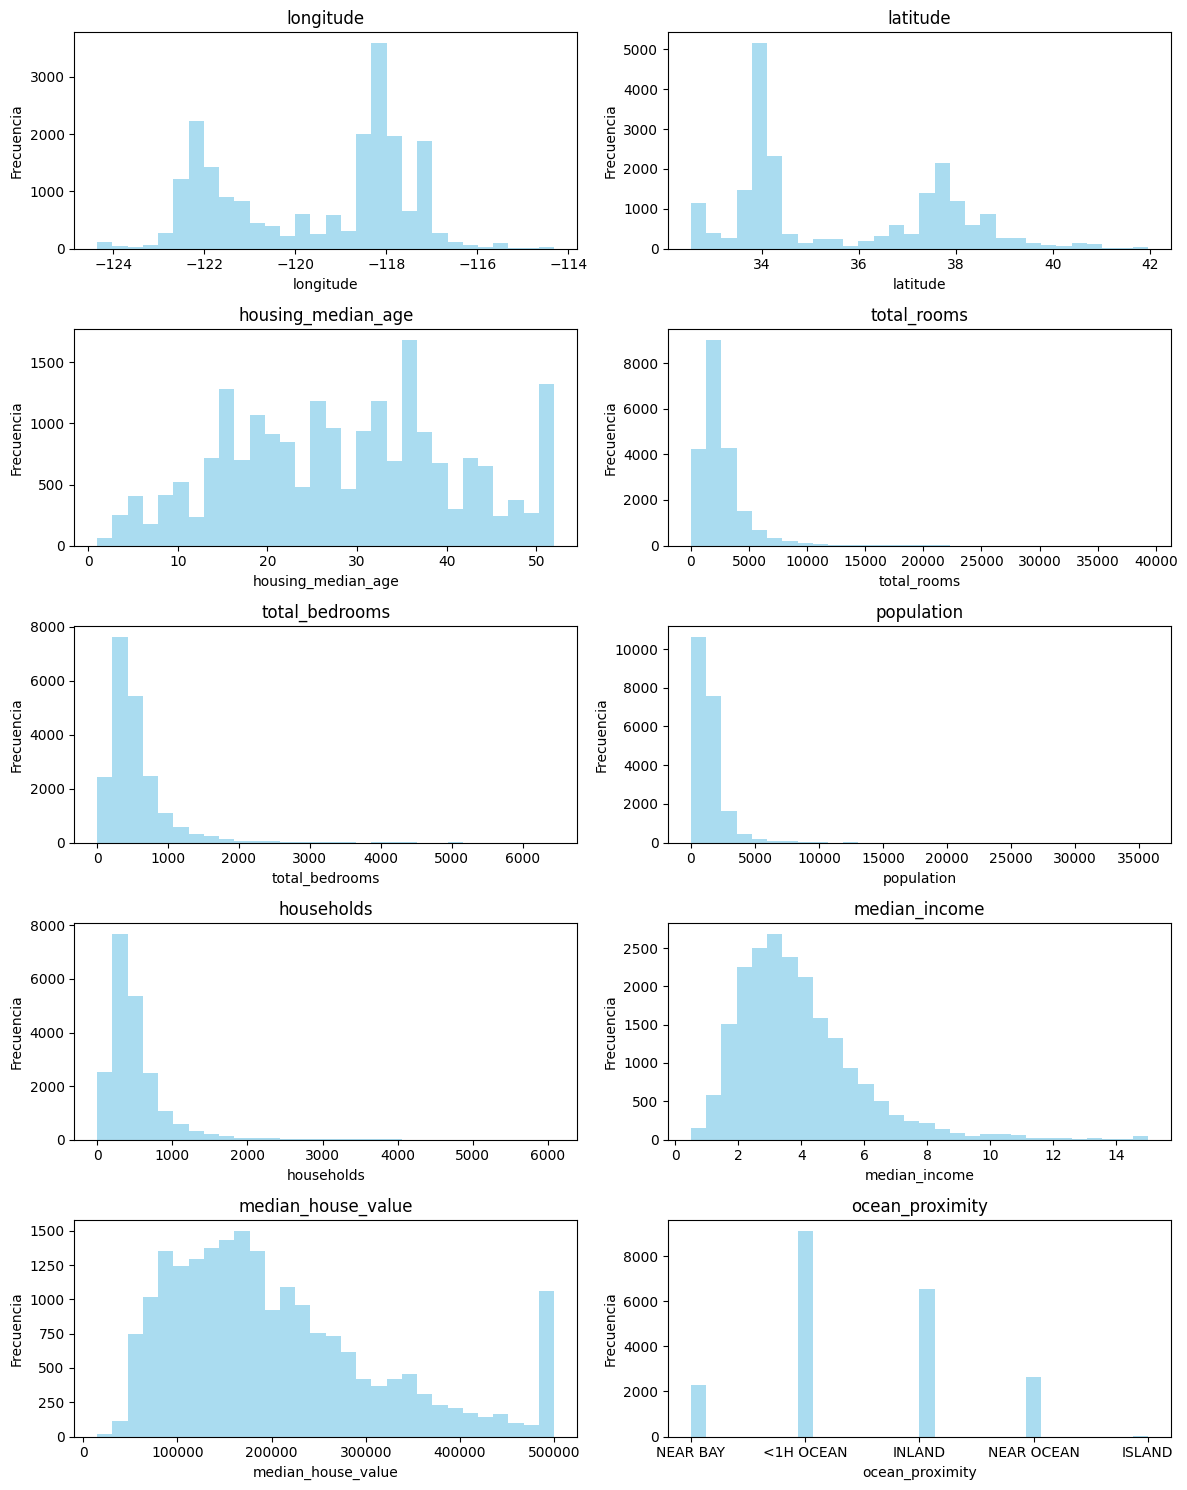

In [ ]:
import matplotlib.pyplot as plt

# Definir el número de filas y columnas para los subgráficos
num_rows = 5
num_cols = 2

# Crear una figura y ejes para los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 15))

# Aplanar los ejes para facilitar la iteración
axes = axes.flatten()

# Iterar sobre las columnas y graficar cada una en un subgráfico
for i, column in enumerate(df.columns):
    # Graficar el histograma de la columna actual
    axes[i].hist(df[column], bins=30, color='skyblue', alpha=0.7)
    # Agregar título a cada subgráfico
    axes[i].set_title(column)
    # Agregar etiquetas a los ejes
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


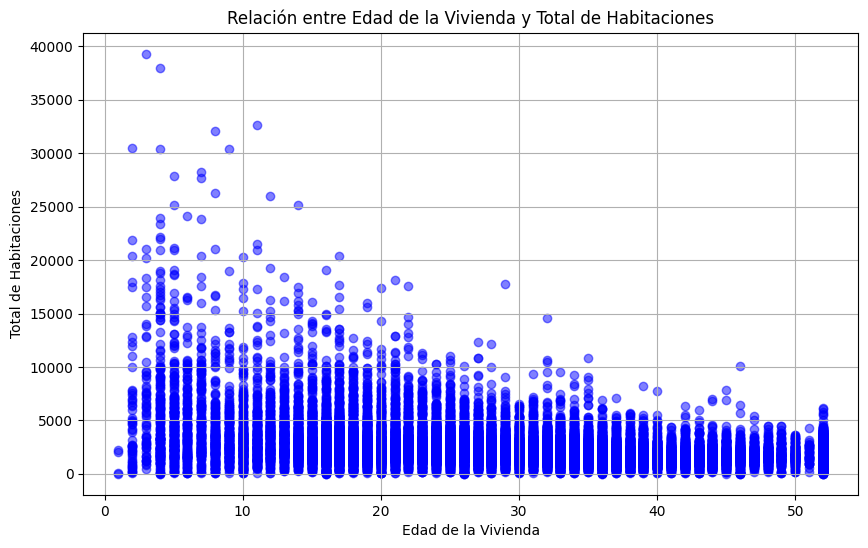

Correlación entre Edad de la Vivienda y Total de Habitaciones: -0.36126220122231223


In [ ]:
import matplotlib.pyplot as plt

# Graficar un diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['housing_median_age'], df['total_rooms'], alpha=0.5, color='blue')
plt.title('Relación entre Edad de la Vivienda y Total de Habitaciones')
plt.xlabel('Edad de la Vivienda')
plt.ylabel('Total de Habitaciones')
plt.grid(True)
plt.show()

# Calcular la correlación entre las dos variables
correlation = df['housing_median_age'].corr(df['total_rooms'])
print(f"Correlación entre Edad de la Vivienda y Total de Habitaciones: {correlation}")


ESTE GRAFICO QUE VEMOS NOS DA A ENTENDER QUE MIENTRAS MAS NUEVA EN LA VIVIENDA MAS HABITACIONES TIENE.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar las características (edad de la vivienda) y la variable objetivo (total de habitaciones)
X = df[['housing_median_age']]
y = df['total_rooms']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio (MSE): 4239393.354044757
Coeficiente de determinación (R^2): 0.1312870134840235
